# Python Assignment - ARIMA Forecasting Model for COVID Cases

|Name|SNR|UNR|
|----|---|----|
|Ciprian Tudor|2029809|u199950|

# Abstract

Using data up until November 8th 2020, I parametrize two types of ARIMA models to predict the number of total COVID cases in the world and in the EU, and then compare this forecast to the actual data up to January 8th 2021. I use two ways of validation for choosing the ARIMA models (walk-forward and non-walk-forward) and compare their accuracy. In the end, the non-walk-forward method provided more accurate results for the World forecast and managed to offer a surprisingly accurate prediction of 850,000 forecast vs. 812,212 actual. In the case of EU forecasts, both approaches yielded highly innacurate predictions due to the fortuitous development of EU cases dropping in the period November to January 8th. Overall, ARIMA models continue to be an appropriate forecast method to be used as part of an economist's toolkit in the case of relatively stable growth of the time-series variable being analyzed.

# Table of Contents

## 1. [Research Question](#RQ)

___

## 2. [Motivation](#Mo)

___

## 3. [Methodology](#Me)

### 3.1 [Data](#Da)

___

## 4. [Results](#Re)

### 4.1 [Preview of Answers](#Pre)

### 4.2 [Data Cleaning](#Cle)

### 4.3 [Context and Visualization](#Vis)

### 4.4 [World Cases Forecasting](#Wo)
##### 4.4.0 [Persistence Model](#Per)
##### 4.4.1 [ARIMA Model (Walk-Forward Validation)](#WF)

4.4.1 a) [Manual ARIMA Parameter Selection](#Manual)

4.4.1 b) [Automated ARIMA Parameter Search](#Auto)

4.4.1 c) [Forecasting](#ForNWF)

##### 4.4.2 [ARIMA Model (Non-Walk-Forward Validation)](#NWF)

### 4.5 [EU Cases Forecasting](#EU)
##### 4.4.0 [ARIMA Model (Walk-Forward Validation)](#EUWF)
##### 4.4.1 [ARIMA Model (Non-Walk-Forward Validation)](#EUNWF)
### 4.6 [Comparison of Forecast to Real Data](#forecast)
___

## [5. Conclusion and Discussion](#Conc)



## [6. Bibliography](#Bib)

___

# 1. Research Question(s) <a class="RQ" id="RQ"></a>

What is the forecasted number of new COVID-19 cases 60 days into the future using data from November 8th 2020 in a) the world and b) the EU? 

How closely does this match the actual development of the cases on January 8th 2021?


# 2. Motivation <a class="Mo" id="Mo"></a>

The COVID-19 pandemic that swept through the world at an accelerating pace since the start of 2020 has numerous economic impacts. Most notably, it is the cause of a massive slowdown in productivity, widespread job loss and insecurity, as well as decreased investment/consumption on the part of businesses and consumers. Put together, these effects and more work to cause a massive crisis with lasting economic consequences. By an [IMF estimate](https://www.imf.org/en/Publications/REO/EU/Issues/2020/10/19/REO-EUR-1021), "real GDP fell by about 40 percent in the second quarter of 2020 (annualized quarter-over-quarter)". 

Despite prevention measures being put in place across the world, the spread of the virus has continued accelerating. With herd immunity nowhere in sight, it is thus important to research if an accurate forecast can be provided of how the number of new cases might continues to develop.

If forecasts such as the one at hand have an acceptable degree of accuracy, governments and bussinesses can better prepare to deal with the consequences of the pandemic's development.

# 3. Methodology <a class="Me" id="Me"></a>

The change in new cases of COVID will be forecasted by using an ARIMA model (Auto-Regressive Integrated Moving Average), one of the most popular single variable time-series forecasting models.

The dataset consists of new cases data from the start of the pandemic to November 8th 2020. It will be split into two: a "train" part for running the model comprising 75% of datapoints and a "test" part to check and validate the accuracy of potential forecasts comprising the remaining 25% of datapoints. The validation part can be performed in mainly two ways:

1. As this [article](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/) approaches the problem, they use "walk-forward" validation in which the model is trained up until the latest period and uses all these values to forecast the next period. This essentially changes the validation dataset so it increases by one for each additional day it forecasts within it (i.e. to forecast the e.g. 90th% percentile datapoint, it uses the first 89% of datapoints). As will be seen, this looks very promising and in fact provides highly accurate short term forecasts, but when dealing with longer term out of sample forecasts, it can turn out to lose its accuracy.

2. Secondly, my own approach will use only the train dataset to adjust the model afterwhich the test part will be treated as an out of sample forecast. This has the potential to provide better long term estimates.

Ultimately, the research question will be answered by discussing the results of both approaches and comparing the forecast from November 8th to the actual data on January 8th.




## 3.1 Data <a class="Da" id="Da"></a>

The pandemic data being used comes from "a collaborative effort between the researchers of the Oxford Martin Programme on Global Development at the University of Oxford, who are the scientific editors of the website content; and the non-profit organization Global Change Data Lab, who publishes and maintains the website." The source data can be found [here](https://ourworldindata.org/coronavirus-source-data). In particular, I use the data sets for New Confirmed Cases and Population. As a note, a measure for total cases can be found by summing all the new cases up until a point in time.

The data is from November 8th 2020 when the forecasting part of the project was conducted. From this, the resulting ARIMA model was used to forecast 60 days into the future and the prediction was compared to the actual development up until January 8th 2021.



# 4. Results <a class="Re" id="Re"></a>

## 4.1 Preview of Answer: <a class="Pre" id="Pre"></a>

As it will be seen in the following section, the forecasts obtained from the two different types of models in the World and EU as with data from November 8th forecasting for January 8th is:

World Cases Forecast:
- Walk-forward validation forecast ARIMA(5,1,0):         650,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,2):     850,000 New Cases


EU Cases Forecast:
- Walk-forward validation forecast ARIMA(5,2,2):         600,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,0):     1,250,000 New Cases

In contrast, the real number of cases 60 days into the future on January 8th is:

- World: 812,212

- EU: 186,392


We may conclude that the non-walk forward validation method performed better in forecasting in the World scenario, whereas the walk-forward method performed better in the case of EU. However, for the EU, both approaches yielded severely inaccurate predictions.


## 4.2 Data Cleaning <a class="Cle" id="Cle"></a>

I begin by importing the pandas package and bringing the csv data files into pandas dataframes. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
n_cases = pd.read_csv("new_cases.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
pops = pd.read_csv("populations.csv")
s_index = pd.read_csv("strictness index.csv")

Now I explore the datasets to understand how they are structured. I beging by displaying the first and last 5 rows of the New Cases dataframe.

In [3]:
n_cases.head(5)

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
n_cases.tail(5)

,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-11-04,504812,86.0,381.0,405.0,22.0,193.0,0.0,2.0,12145.0,2374.0,...,31.0,299.0,0.0,395.0,11.0,0.0,0.0,4.0,118.0,21.0
2020-11-05,569224,121.0,396.0,548.0,135.0,349.0,0.0,0.0,10652.0,2413.0,...,49.0,226.0,0.0,0.0,4.0,0.0,0.0,0.0,37.0,17.0
2020-11-06,587015,40.0,421.0,0.0,90.0,236.0,0.0,0.0,11100.0,2210.0,...,64.0,360.0,0.0,821.0,0.0,0.0,0.0,0.0,72.0,17.0
2020-11-07,576388,58.0,489.0,1273.0,0.0,289.0,0.0,0.0,11786.0,2476.0,...,61.0,0.0,0.0,384.0,6.0,0.0,0.0,3.0,49.0,27.0
2020-11-08,566010,126.0,495.0,581.0,184.0,121.0,0.0,1.0,8037.0,2175.0,...,71.0,228.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0,27.0


The data set for new cases shows daily data from all countries starting on the 31st of December 2019 up until the 8th of November. The beginning of the dataset contains many empty cells since there were no cases being recorded early into the year. At the end of the dataset (Nov. 8), there are roughly 570,000 global new cases every day.

Next, I look at the first and last 5 rows of the populations dataset.

In [5]:
pops.head(5)

,countriesAndTerritories,location,continent,population_year,population
0,Afghanistan,Afghanistan,Asia,2020.0,38928341.0
1,Albania,Albania,Europe,2020.0,2877800.0
2,Algeria,Algeria,Africa,2020.0,43851043.0
3,Andorra,Andorra,Europe,2020.0,77265.0
4,Angola,Angola,Africa,2020.0,32866268.0


In [6]:
pops.tail(5)

,countriesAndTerritories,location,continent,population_year,population
208,Wallis_and_Futuna,Wallis and Futuna,Oceania,2020.0,11246.0
209,Western_Sahara,Western Sahara,Africa,2020.0,597330.0
210,Yemen,Yemen,Asia,2020.0,29825968.0
211,Zambia,Zambia,Africa,2020.0,18383956.0
212,Zimbabwe,Zimbabwe,Africa,2020.0,14862927.0


The population dataset shows the 2020 population of all countries. To make it match the format of the new cases dataset, I must extract the population data and the country names as column names, inputting them in a new dataframe popdf. I then display the frame to make sure it is in the same format as the new cases data. 

In [7]:
data = [pops.population.tolist()]
popdf = pd.DataFrame(data, columns = pops.countriesAndTerritories, index=['Population'])
popdf

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Wallis_and_Futuna,Western_Sahara,Yemen,Zambia,Zimbabwe
Population,38928341.0,2877800.0,43851043.0,77265.0,32866268.0,15002.0,97928.0,45195777.0,2963234.0,106766.0,...,331002647.0,3473727.0,33469199.0,28435943.0,97338583.0,11246.0,597330.0,29825968.0,18383956.0,14862927.0


I create new dataframes with the relevant information for new cases and population sizes, namely EU countries.

In [8]:
cases = n_cases[['World', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']]
populations = popdf[['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']]

## 4.3 Context and Visualization <a class="Vis" id="Vis"></a>

Next, I take a look at the statistical description of new cases both worldwide and in the EU. (To find the EU cases I have summed the last columns pertaining to EU countries in order to exclude the first column which shows World cases; afterwhich I created a new dataframe to describe the information for only World and EU). It can be seen that the average number of new cases is approximately 160 thousand for the world and 25 thousand for EU for the period of 314 days. The standard deviation is naturally high as the number of total cases greatly increased from the start of the recording period.

In [9]:
cases['EU Cases'] = cases.iloc[:, -27:].sum(axis=1)
EU = cases['EU Cases']
cases.pop('EU Cases')
cases.insert(1, 'EU Cases', EU)

w_eu = cases[['World', 'EU Cases']].copy()
w_eu.describe()

C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,World,EU Cases
count,314.000000,314.000000
mean,159061.668790,25033.595541
std,142062.251855,46153.119289
min,0.000000,0.000000
25%,17892.500000,2837.250000
50%,120604.000000,7443.500000
75%,268988.500000,23900.000000
max,587015.000000,237552.000000


Next, I plot the evolution of new cases for the World and EU on the same graph. We may see that while world cases had a relatively steady increase, with an exponential rise towards the end of the period, EU cases actually increased, then decreased and stayed low until the end of the period when it experienced an exponential increase.

C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


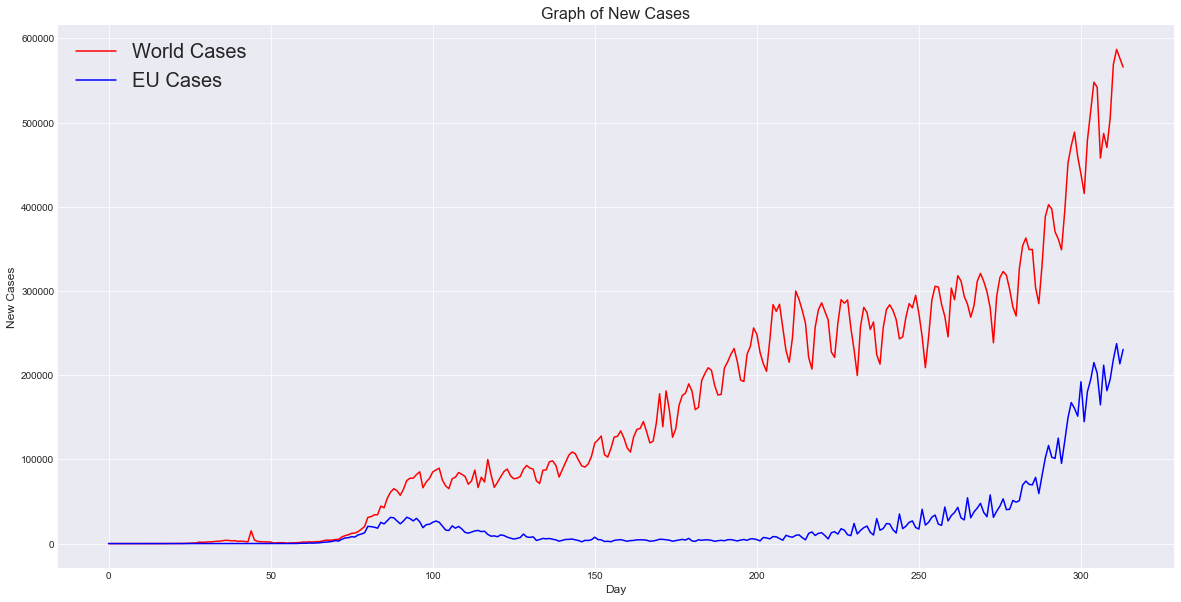

In [10]:
xvals = []
x=0
for i in range(len(cases['World'])):
    xvals.append(x)
    x = x + 1
    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.plot(xvals, cases['World'], color = 'red', label = 'World Cases')
plt.plot(xvals, cases['EU Cases'], color = 'blue', label = 'EU Cases')
plt.xlabel('Day', fontsize = 12)
plt.ylabel('New Cases', fontsize = 12)
plt.title('Graph of New Cases', fontsize = 16)
plt.legend(loc = 'best', prop={'size': 20})
plt.show()

Looking at the evolution of EU cases in more detail, we may see that for the exponential increase in the second part of the period, the cases increased from around 10 thousand to over 200 thousand new cases per day.

C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


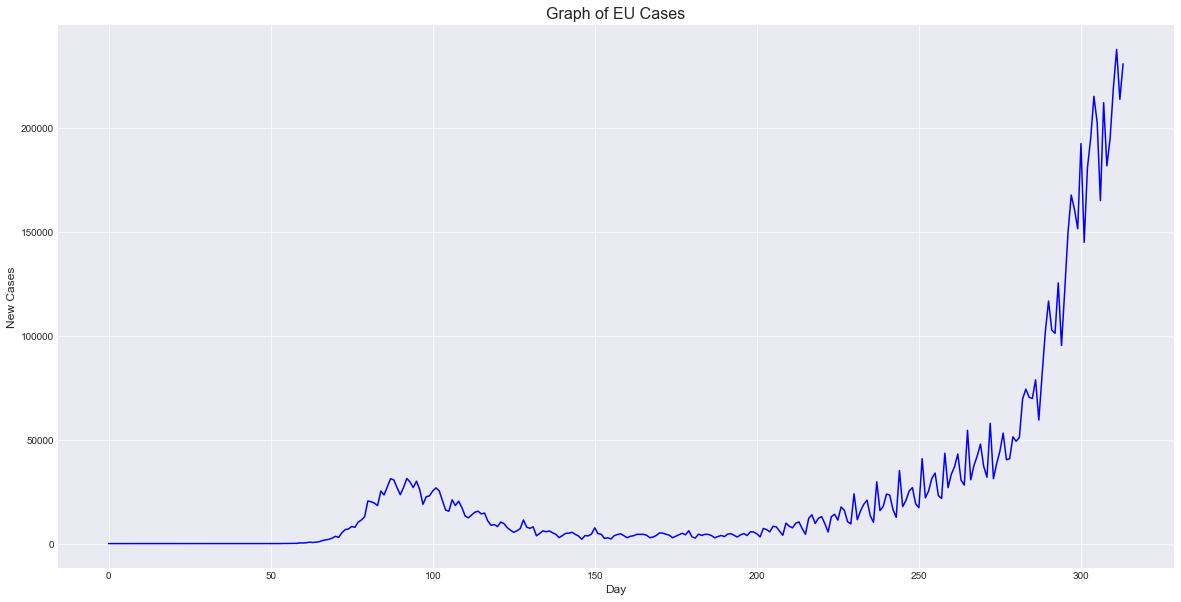

In [11]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.plot(xvals, cases['EU Cases'], color = 'blue')
plt.xlabel('Day', fontsize = 12)
plt.ylabel('New Cases', fontsize = 12)
plt.title('Graph of EU Cases', fontsize = 16)
plt.show()

We can find the total number of cases for each country in the EU, as well as the world, by summing all new cases for the period.

In [12]:
total_cases = cases.sum(axis=0)
print(total_cases.sort_values(ascending=True))

Cyprus                5871.0
Estonia               5933.0
Malta                 7039.0
Latvia                7880.0
Finland              17385.0
Luxembourg           22481.0
Lithuania            22719.0
Slovenia             44271.0
Denmark              54230.0
Greece               54809.0
Croatia              64704.0
Ireland              64855.0
Slovakia             73667.0
Bulgaria             74485.0
Hungary             109616.0
Sweden              146461.0
Austria             146502.0
Portugal            173540.0
Romania             296999.0
Netherlands         403914.0
Czech Republic      411220.0
Belgium             491796.0
Poland              521640.0
Germany             658505.0
Italy               902490.0
Spain              1328832.0
France             1748705.0
EU Cases           7860549.0
World             49945364.0
dtype: float64


Next, I plot the number of total cases versus the population of each EU country. We naturally expect this to have a positive correlation, but some countries are above or below the line of best fit, perhaps indicating better prevention measures being taken. It will be easier to see exactly which country is which by plotting this in an interactive graph in Bokeh.

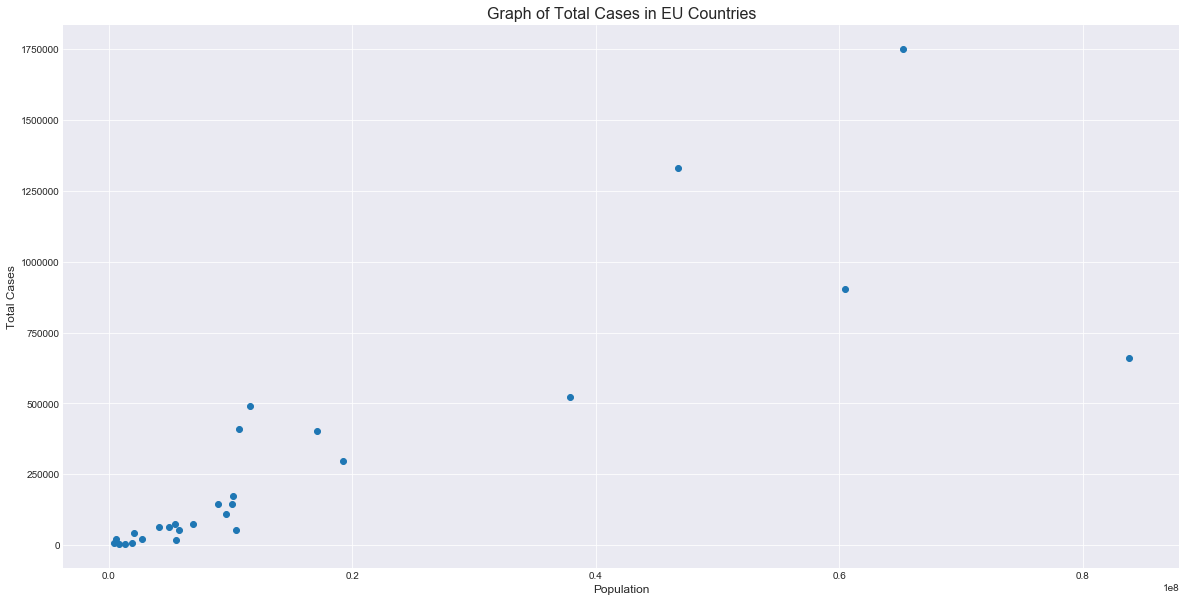

In [13]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.scatter(populations.iloc[0], total_cases.tail(27))
plt.xlabel('Population', fontsize = 12)
plt.ylabel('Total Cases', fontsize = 12)
plt.title('Graph of Total Cases in EU Countries', fontsize = 16)
plt.show()

To shape the data in a way that is easier for Bokeh to process, I transpose the datasets.

In [14]:
populations_trans = populations.transpose()
tcases = total_cases.tail(27).tolist()
populations_trans['Total Cases'] = tcases

Looking at the interactive graph below we may notice that France is above the line of best fit (indicating less effective prevention measures being taken), while Germany is below the line of best fit, despite its even higher population. Most countries are clustered in the lower left side of the graph due to low populations and an accompanying lower number of cases.

In [15]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

output_notebook()

hover = HoverTool(tooltips=[('Country','@countriesAndTerritories'),])

fig = figure(title ='Graph of Total Cases', tools=[hover, 'wheel_zoom', 'pan', 'reset'])
fig.diamond('Population','Total Cases', size=20, source=populations_trans)
fig.xaxis.axis_label = 'Population'
fig.yaxis.axis_label = 'Total Cases'

show(fig)

Loading BokehJS ...

Next, I delve into three countries specifically to see their evolution. The chosen countries are France and Germany (for the reasons mentioned above), as well as the Netherlands due to its placement close to the imaginary line of best fit on the graph above. All 3 countries experienced a somewhat exponential increase towards the end of the period, but France was hit significantly harder than Germany. Surprisingly, the Netherlands actually had a decrease in the number of cases towards the end of the period. 

In [16]:
xvals = []
x=0
for i in range(len(cases['Italy'])):
    xvals.append(x)
    x = x + 1

Y_value = [cases['Netherlands'].tolist(),cases['France'].tolist(), cases['Germany'].tolist()]
X_value = [xvals, xvals, xvals]
legend= ['Netherlands', 'France', 'Germany']
color = ['blue', 'black', 'teal']


mline = figure(title = 'Graph of New Cases per Day', width=800, height=500)

for (y, x, leg, col) in zip(Y_value, X_value, legend, color):
    my_plot = mline.line(x, y, color = col, legend= leg, line_width = 3, line_alpha = 0.8)

mline.xaxis.axis_label = 'Day'
mline.yaxis.axis_label = 'New Cases'
mline.legend.location = "top_left"
mline.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[('Cases','$y')]))

show(mline)

It is also useful to adjust the number of cases to the population of each country. To do this, I divide by the population size and multiply by 1 million to get the number of cases per million. We may see in the dataframe below that the Netherlands and France have a similar number of cases per population, whereas Germany has less than half of the value of these other two countries.

In [17]:
casespop = n_cases[['Netherlands', 'France', 'Germany']]
country = ['Netherlands', 'France', 'Germany']

for c in country:
    casespop[c] = casespop[c] * 1000000 / (populations._get_value('Population', c, takeable= False))

casespop.tail(5)

C:\Users\Ciprian Tudor\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Netherlands,France,Germany
date,,,
2020-11-04,451.068415,556.581052,205.457024
2020-11-05,444.823840,621.354647,238.589863
2020-11-06,406.014098,889.273431,256.684022
2020-11-07,422.063239,926.654598,279.277850
2020-11-08,388.622664,1330.585675,191.170277


Plotting this on a graph once again shows just how low the relative number of cases in Germany is.

In [18]:
Y_value = [casespop['Netherlands'].tolist(), casespop['France'].tolist(), casespop['Germany'].tolist()]
X_value = [xvals, xvals, xvals]
legend= ['Netherlands', 'France', 'Germany']
color = ['blue', 'black', 'teal']



mline2 = figure(title = 'Graph of New Cases per Million Citizens per Day', width=800, height=500)

for (y, x, leg, col) in zip(Y_value, X_value, legend, color):
    my_plot = mline2.line(x, y, color = col, legend= leg, line_width = 3, line_alpha = 0.8)

mline2.xaxis.axis_label = 'Day'
mline2.yaxis.axis_label = 'New Cases (per Million Citizens)'
mline2.legend.location = "top_left"
mline2.add_tools(HoverTool(show_arrow=False, line_policy='next', tooltips=[('Cases','$y')]))

show(mline2)

## 4.4 World Cases Forecasting <a class="Wo" id="Wo"></a>

N.B. : I begin by describing the forecasting procedure in detail for worldwide COVID cases, after which I will implement it for the chosen EU countries as well. 

### 4.4.0 Persistence Model <a class="Per" id="Per"></a>

Inspired by this [article](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), as a starting point, I begin by providing a baseline model called persistence (or naive) forecast, which the next models will be compared to. This is a useful measure to gauge the performance of the ARIMA forecasts. 

I split the dataset into two parts: a "train" part which the model uses to adjust the accuracy of its predictions, and a validation / "test" part in which the model forecasts are compared to the actual datapoints. Because the dataset has many available points, the train data set is the first 75% of datapoints, whereas the test one is the last 25%.

In [18]:
w_cases = cases['World']

W = w_cases.values
W = W.astype('float32')
train_size = int(len(W) * 0.75)
train, test = W[0:train_size], W[train_size:]

One way to measure the performance of predictions is using the Root Mean Squared Error (RMSE). As explained [here](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/), the RMSE is a measure of how far each data point is away from the prediction line (i.e. a mean of the absolute value of the residuals). In other words, it takes the errors (or residuals), squares them to obtain positive values, then finds a mean of these, afterwhich it finds the square root to obtain the RMSE. It is one of the most commonly used ways to test the accuracy of forecasts. 

The code below uses the persistence model, simply yesterday's value to predict today's value. It then outputs the forecasted value along with the actual value, as well as the RMSE for the forecast.

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Forecasted=%.3f, Actual=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Forecasted=274453.000, Actual=254321
>Forecasted=254321.000, Actual=263311
>Forecasted=263311.000, Actual=224221
>Forecasted=224221.000, Actual=213181
>Forecasted=213181.000, Actual=256559
>Forecasted=256559.000, Actual=278262
>Forecasted=278262.000, Actual=283632
>Forecasted=283632.000, Actual=276981
>Forecasted=276981.000, Actual=266054
>Forecasted=266054.000, Actual=243219
>Forecasted=243219.000, Actual=245516
>Forecasted=245516.000, Actual=269005
>Forecasted=269005.000, Actual=284976
>Forecasted=284976.000, Actual=280065
>Forecasted=280065.000, Actual=294907
>Forecasted=294907.000, Actual=273441
>Forecasted=273441.000, Actual=246029
>Forecasted=246029.000, Actual=209017
>Forecasted=209017.000, Actual=245696
>Forecasted=245696.000, Actual=289184
>Forecasted=289184.000, Actual=305691
>Forecasted=305691.000, Actual=304696
>Forecasted=304696.000, Actual=284136
>Forecasted=284136.000, Actual=269943
>Forecasted=269943.000, Actual=245521
>Forecasted=245521.000, Actual=303523
>Forecasted=

The persistence model was wrong by around 30,000 cases for each prediction. This will serve as the basis performance measure to which further ARIMA models will be compared.

N.B.: For predicting the number of new cases in a specific day, the persistence model uses yesterday's datapoint (walk-forward validation). As such, this model makes use of data which would not be available if we wish to perform an "out of sample" forecast, because if we predict e.g. 14 days into the future, we wouldn't have the actual value of the 13th day. Thus, this makes it significantly more accurate than the RMSE values that non-walk-forward validation methods will use. But at the moment, I am starting with an ARIMA model that will be evaluated in the same way as the persistence model.

### 4.4.1 ARIMA Model (Walk-Forward Validation) <a class="WF" id="WF"></a>

The ARIMA(p,d,q) model is a forecasting approach which predicts values of a time series based on the series' own past values, using its own lags and lagged forecast errors. It consists of 3 terms: p, d, and q. The "p" term refers to the order of AR - Auto Regression, which is the number of lags to be used. The "q" term refers to the order of MA - Moving Average, which is the number of lagged forecast errors to be used. Lastly, the "d" term refers to the number of differences that must be taken to transform the series into a stationary one. Mathematically, it looks as such:

\begin{equation*}
   \hat{y}_t =  \mu + \omega_1 y_{t-1} + ... + \omega_p y_{t-p} + \theta_1 \epsilon_{t-1} + ... + \theta_q \epsilon_{t-q}
   \end{equation*} 
   
Where omega is the AR coefficient at a certain lag k, and epsilon is the coefficient on the lagged forecast error made at period k such that:

\begin{equation*}
   \epsilon_{t-k} = y_{t-k} - \hat{y}_{t-k}
   \end{equation*} 

For the process of choosing the p, d, and q values, I begin by selecting them manually from graphical analysis, after which I will implement an automated process to determine the best suited model.

### 4.4.1 a) Manual ARIMA Parameter Selection <a class="Manual" id="Manual"></a>

#### "d" Term

Before determining the p and q terms, one of the requirements is to check whether the data is non-stationary and will have to be differenced. The condition for stationarity holds if:
1. The mean of a series is not a function of time (it is drawn from a constant distribution).
2. The variance of a series is not a function of time (it is drawn from a constant distribution).
3. There is no seasonality in the data.

The third condition is satisfied by the nature of the data: since it is roughly one year (as opposed to multiple repeating years or seasons), no seasonality occurrs. Next, the first and second conditions can be checked by plotting a moving average of the mean and standard deviation. 

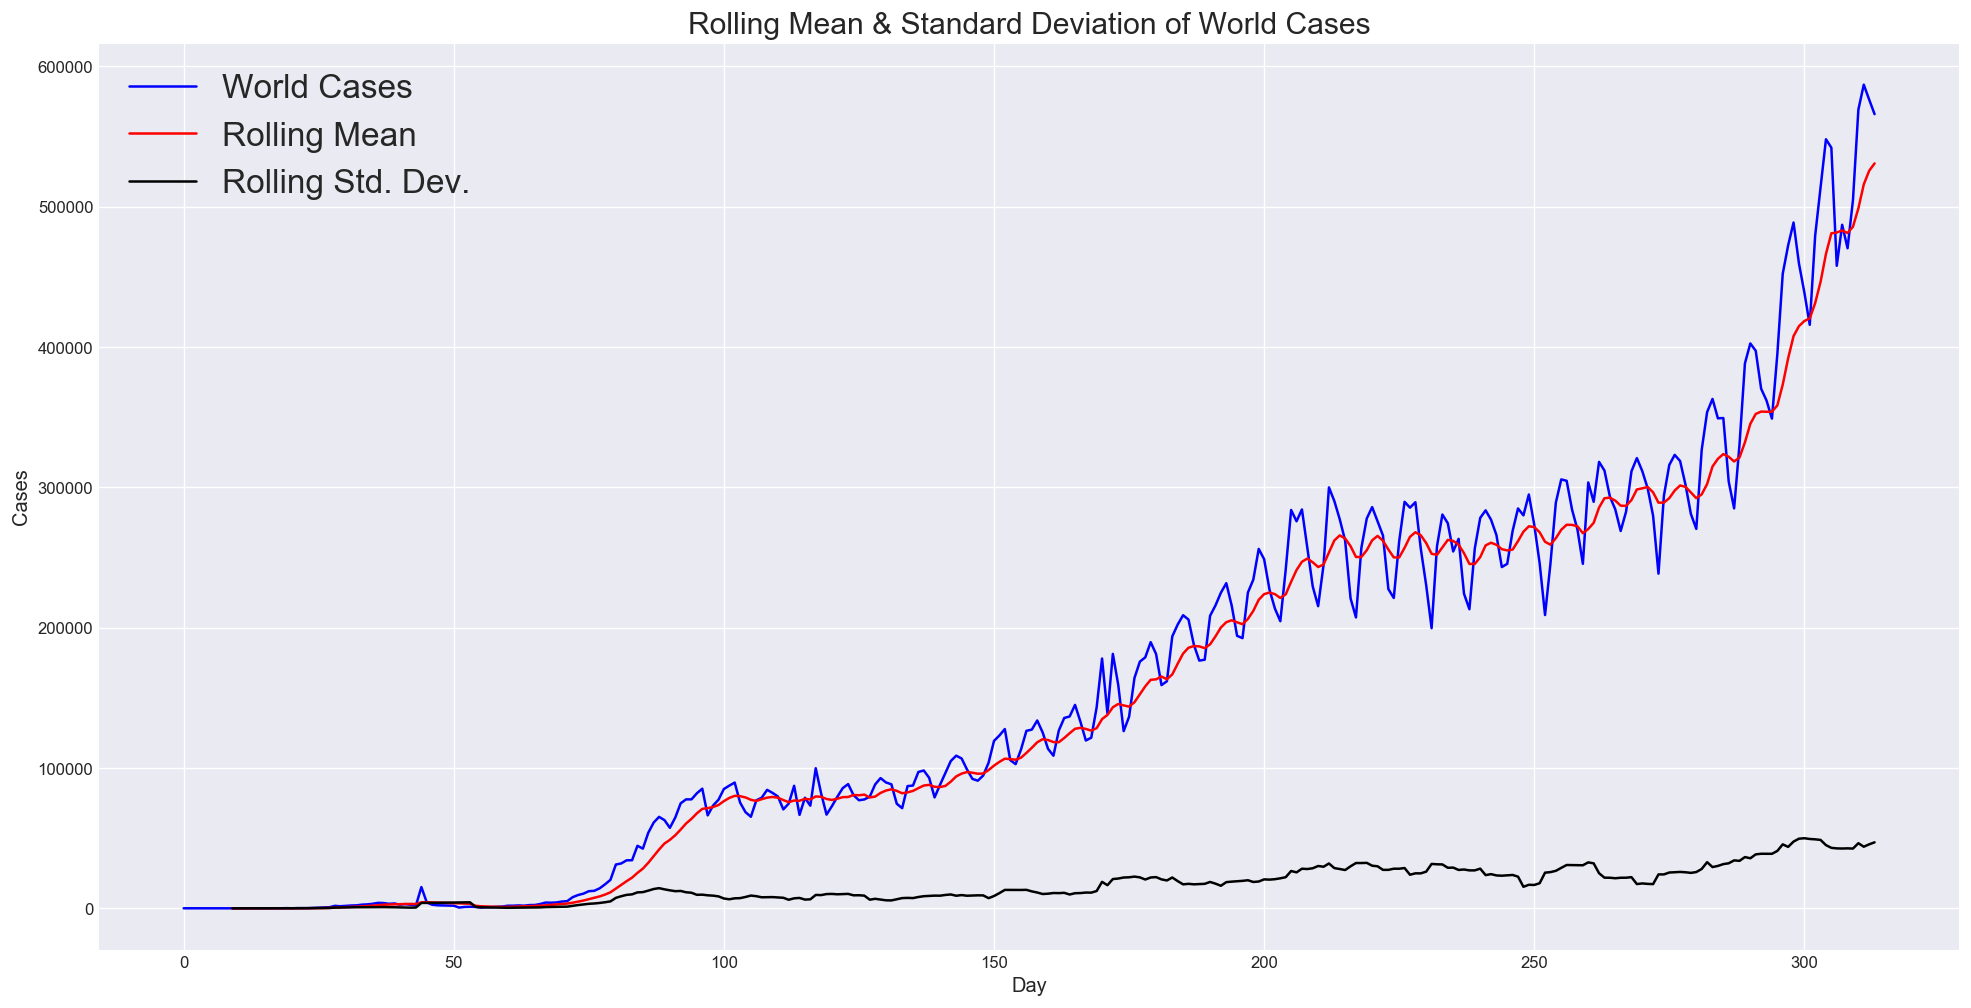

In [70]:
w_cases = cases['World']
w_cases_mean = w_cases.rolling(window = 10).mean()
w_cases_std = w_cases.rolling(window = 10).std()

plt.figure(figsize=(20,10))
plt.plot(xvals, w_cases, color = 'blue', label = 'World Cases')
plt.plot(xvals, w_cases_mean, color = 'red', label = 'Rolling Mean')
plt.plot(xvals, w_cases_std, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best', prop={'size': 20})
plt.title('Rolling Mean & Standard Deviation of World Cases', fontsize = 18)
plt.xlabel('Day', fontsize = 12)
plt.ylabel('Cases', fontsize = 12)
plt.show()

From the graph above, it appears that the cases are not drawn from a constant distributon (mean changes over time) and the series is heteroskedastic (the standard deviation changes over time). As such, the series is most likely not stationary.

The formal way to test stationarity is by performing a unit root test (URT), one of the most common of which is the Augmented Dickey Fueller (ADF) test. This tests the presence of a unit root which would make the series non-stationary. A unit root exists if the value of alpha is 1 in the equation below. 

\begin{equation*}
   y_t = c + \alpha y_{t-1} + \phi \Delta Y_{t-1} + \beta t + \epsilon 
   \end{equation*} 
   
Where delta Y refers to the first difference of the series.

Luckily, this can be done by using a statisical package. The null hypothesis of the ADF test is that alpha = 1, i.e. the series is non-stationary. 

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(w_cases.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.757743
p-value: 0.998261


Since the p-value is greater than a significance level of 0.05, we cannot reject the null hypothesis that the series is non-stationary. As such, it must be differenced and the "d" term of the ARIMA model will be at least 1.

As inspired by this [article](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/), the following graph outputs different levels of differencing for the series and also shows the autocorrelation at that level (which is the correlation between a certain lagged value and the current one). As explained by this Duke University [website](https://people.duke.edu/~rnau/411arim2.htm), several rules of thumb make the autocorrelation plot useful in identifying the proper amount of differencing.

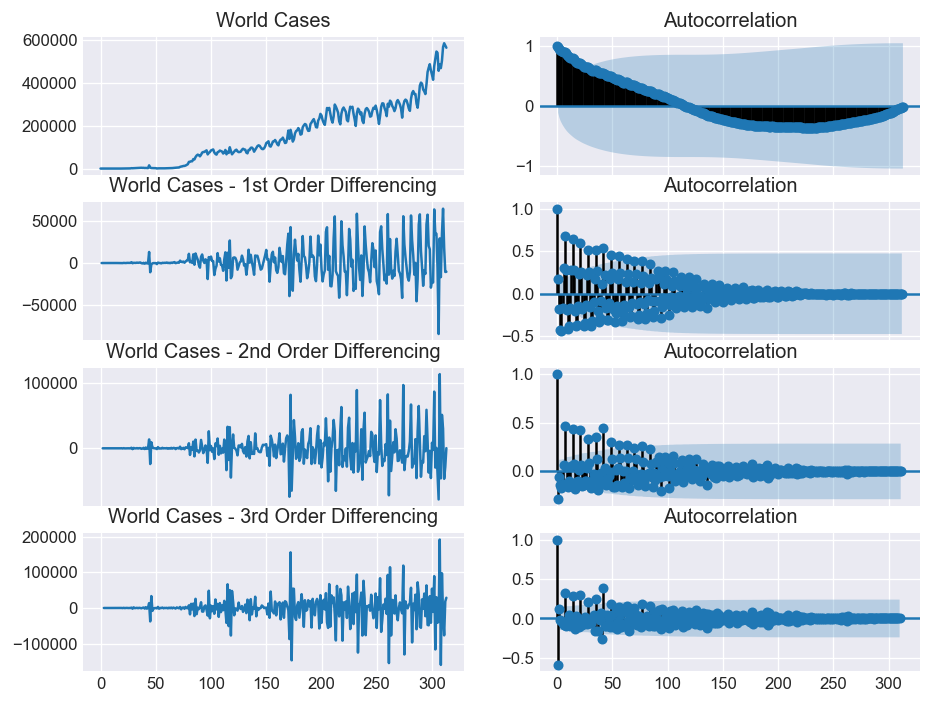

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
df_fix = pd.read_csv("new_cases.csv")
ww_cases = df_fix['World']


# Original
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(ww_cases); axes[0, 0].set_title('World Cases')
plot_acf(ww_cases, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ww_cases.diff()); axes[1, 0].set_title('World Cases - 1st Order Differencing')
plot_acf(ww_cases.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ww_cases.diff().diff()); axes[2, 0].set_title('World Cases - 2nd Order Differencing')
plot_acf(ww_cases.diff().diff().dropna(), ax=axes[2, 1])


axes[3, 0].plot(ww_cases.diff().diff().diff()); axes[3, 0].set_title('World Cases - 3rd Order Differencing')
plot_acf(ww_cases.diff().diff().diff().dropna(), ax=axes[3, 1])


plt.show()

From the above graph, it can be noticed that the series reaches stationarity within 1 order of differencing: the values of the series are all centered around zero, indicating they are drawn from a constant distribution.

One rule from the Duke website indicates that "the optimal order of differencing is often the order of differencing at which the standard deviation is lowest". We may see that the standard deviation in the plots decreases as further differencing is implemented. However, at the 3rd order of differencing, the 2nd lagged value has an autocorrelation of above -0.5. As one rule explains, this may indicate overdifferencing, which can negatively impact the accuracy of the forecasts. As such, I will tentatively fix the "d" term for now as 1 or 2 (i.e. 1st or 2nd order differencing).

#### "p" Term

Next, I identify the "p" (or AR) term of the model. This is done by making use of the autocorrelation and partial autocorrelation plots of the non-differenced series (the shaded area shows statistical significance above a 95% confidence interval). As this Duke University [article](https://people.duke.edu/~rnau/411arim3.htm) explains, "the partial autocorrelation at lag 2 is the difference between the actual correlation at lag 2 and the expected correlation due to the propagation of correlation at lag 1". In other words, even though the autocorrelation is signficant out to a high number of lags (in the graph below up to around 25 lags), this may occurr simply due to the propagation of the lag 1 autocorrelation. This can be checked within the partial autocorrelation plot. 

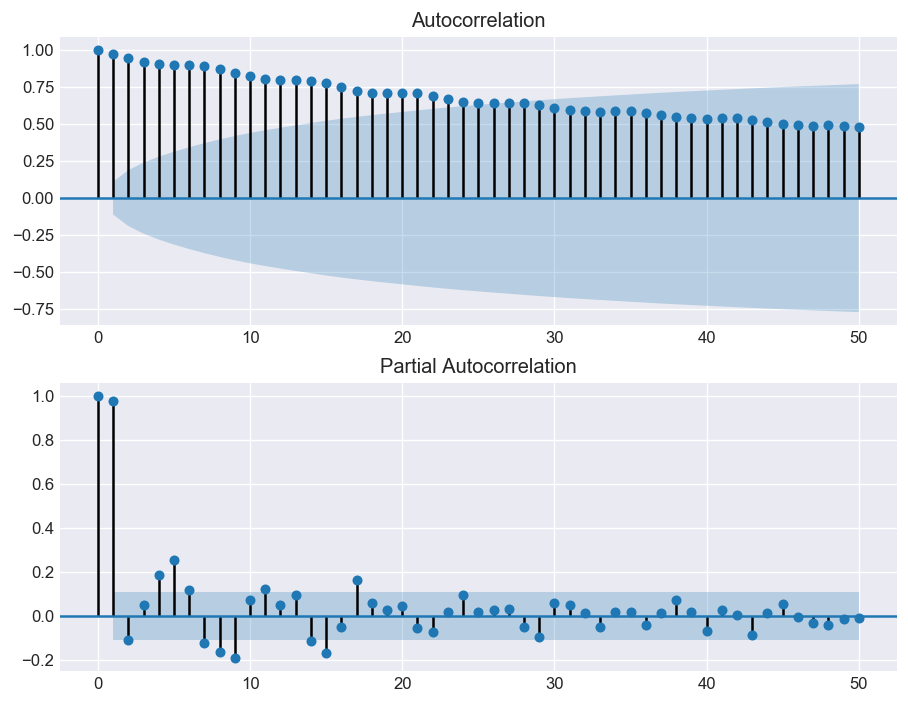

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plt.figure()
plt.subplot(211)
plot_acf(w_cases, ax=plt.gca(), lags = 50)
plt.subplot(212)
plot_pacf(w_cases, ax=plt.gca(), lags = 50)
plt.show()

From the graph above, we may notice that the partial autocorrelation plot indeed confirms that autocorrelation lags were simply propagated: there is a sharp cutoff at lag 2. This difference in significance indicates the order of the "p" term we must choose; as it is explained, higher-order autocorrelations are sufficiently explained by the lag-1 autocorrelation. As such, I will tentatively fix the AR term p = 1 for intial testing. 

#### "q" Term

Lastly, we must identify the "q" (or MA) term of the model. This is also done using the previously mentioned autocorrelation plots, but now on the differenced series. A Duke University [summary](https://people.duke.edu/~rnau/arimrule.htm) points out that in the presence of a sharp cutoff, at least one MA term should be included. Observe the graphs below:

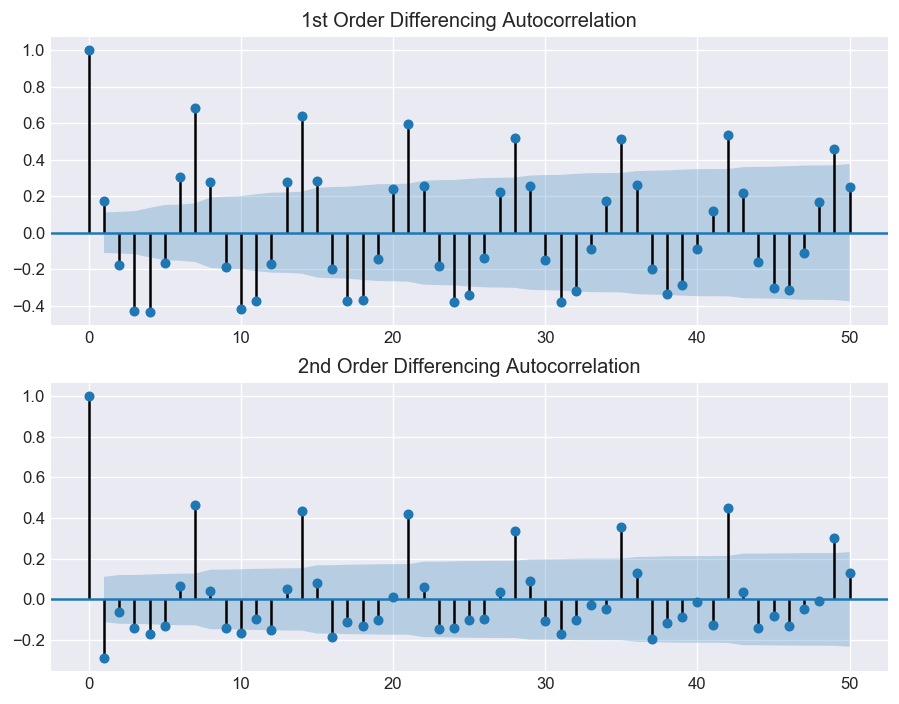

In [24]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plt.figure()
plt.subplot(211)
plot_acf(ww_cases.diff().dropna(), ax=plt.gca(), lags = 50, title = '1st Order Differencing Autocorrelation')
plt.subplot(212)
plot_acf(ww_cases.diff().diff().dropna(), ax=plt.gca(), lags = 50, title = '2nd Order Differencing Autocorrelation')
plt.show()

In the graphs, it can be seen that in both orders of differencing there are constantly significant lags (outside the shaded area of 95% signficance) as the series continues, e.g. at around 8, 14, 21, etc. As rule 7 of the abovementioned summary points out, if there is a lack of cutoff, i.e. series not converging to around zero autocorrelation quickly, an MA term should not be added. As such, I will tentatively fix the MA term q = 0. 

At this point, based on the graphs above, we have tentatively chosen two models: an ARIMA(1,1,0) or ARIMA(1,2,0). The code below once again splits the series into a train and test sample and forecasts values using all data available up to a certain point in time based on the updating list "history" (walk-forward validation). Finally, it outputs the performance measure of the RMSE by comparing the recorded predictions from "predictions" list with the actual values from the test dataset.

#### ARIMA (1,1,0)

In [25]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

W = w_cases.values
W = W.astype('float32')
train_size = int(len(W) * 0.75)
train, test = W[0:train_size], W[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(trend = 'nc', disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=273552.695, Expected=254321
>Predicted=251349.147, Expected=263311
>Predicted=264592.643, Expected=224221
>Predicted=218946.236, Expected=213181
>Predicted=211640.728, Expected=256559
>Predicted=262174.371, Expected=278262
>Predicted=281366.965, Expected=283632
>Predicted=284405.381, Expected=276981
>Predicted=276028.241, Expected=266054
>Predicted=264474.696, Expected=243219
>Predicted=239816.522, Expected=245516
>Predicted=245852.564, Expected=269005
>Predicted=272470.413, Expected=284976
>Predicted=287420.781, Expected=280065
>Predicted=279324.067, Expected=294907
>Predicted=297124.922, Expected=273441
>Predicted=270374.341, Expected=246029
>Predicted=241847.534, Expected=209017
>Predicted=202762.778, Expected=245696
>Predicted=250854.218, Expected=289184
>Predicted=296363.549, Expected=305691
>Predicted=308529.049, Expected=304696
>Predicted=304525.983, Expected=284136
>Predicted=280615.936, Expected=269943
>Predicted=267461.130, Expected=245521
>Predicted=241124.266, Ex

The ARIMA(1,1,0) model performs slightly better than the persistence model. In fact, it is more accurate by around 400 cases per day, but that is a rather small improvement.

#### ARIMA(1,2,0)

In [26]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(1,2,0))
    model_fit = model.fit(trend = 'nc', disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=276488.211, Expected=254321
>Predicted=238063.848, Expected=263311
>Predicted=264072.080, Expected=224221
>Predicted=199398.300, Expected=213181
>Predicted=193596.290, Expected=256559
>Predicted=284495.413, Expected=278262
>Predicted=306199.273, Expected=283632
>Predicted=293609.266, Expected=276981
>Predicted=273684.079, Expected=266054
>Predicted=256315.676, Expected=243219
>Predicted=223686.792, Expected=245516
>Predicted=240768.955, Expected=269005
>Predicted=286722.418, Expected=284976
>Predicted=302997.635, Expected=280065
>Predicted=280809.791, Expected=294907
>Predicted=304334.664, Expected=273441
>Predicted=262170.708, Expected=246029
>Predicted=220248.898, Expected=209017
>Predicted=174632.823, Expected=245696
>Predicted=261663.276, Expected=289184
>Predicted=330899.562, Expected=305691
>Predicted=329268.642, Expected=304696
>Predicted=308169.725, Expected=284136
>Predicted=268488.128, Expected=269943
>Predicted=254149.606, Expected=245521
>Predicted=223675.832, Ex

The ARIMA(1,2,0) model performs significantly worse than the previous one, as well as the persistence model, it is worse by around 5,000 cases per day, a rather large deviation from previous results. As such, we may understand that 2nd order differencing in fact overdifferences the series and negatively impacts the accuract of the forecasts.

### 4.4.1 b) Automated ARIMA Parameter Search <a class="Auto" id="Auto"></a>

Next, with code from one of the previously mentioned [articles](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), there is a way to automate the parameter searching process. This can ultimately yield much more accurate forecast results by quickly testing and comparing many parameter combinations. 

The code below creates two functions: "evaluate_arima_model" to run a specific ARIMA model, and "evaluate_models" to run each model across the chosen parameter lists and record their RMSEs. 

Evaluate_arima_moel begins by transforming the type of the list of world cases so it can be analyzed by the ARIMA model package. It then splits the list into two: a train and test dataset, 75% and 25% of the whole list respectively. It then creates a list called history modifies the training set every time the model is evaluated. This is done to create the walk-forward type of validation. Next it evaluates the model and records the forecasted values in a list predictions, after which it outputs the RMSE between the list of predictions and the actual values in the test section of the list.

The function evaluate_models runs the function evaluate_arima_model over the chosen parameter list and the chosen dataset. It also compares the RMSEs of each of the ran models and outputs the best selection.

N.B. The code will take quite a long time to run and will ignore certain parameter combinations that give an error. 

In [27]:
X = w_cases.values

def evaluate_arima_model(X, arima_order):
    #training set
    X = X.astype('float32')
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # prediction list
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # accuracy test
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

#parameter search
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


series = w_cases

p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=187076.396
ARIMA(0, 1, 1) RMSE=28830.823
ARIMA(0, 1, 2) RMSE=28942.075
ARIMA(0, 1, 3) RMSE=27480.967
ARIMA(0, 2, 1) RMSE=29293.199
ARIMA(0, 2, 2) RMSE=28774.107
ARIMA(0, 2, 3) RMSE=26960.295
ARIMA(1, 0, 0) RMSE=29565.250
ARIMA(1, 1, 0) RMSE=28941.961
ARIMA(1, 1, 2) RMSE=28013.662
ARIMA(1, 2, 0) RMSE=35657.711
ARIMA(2, 1, 0) RMSE=28676.273
ARIMA(2, 2, 0) RMSE=35753.489
ARIMA(3, 1, 0) RMSE=26557.284
ARIMA(3, 1, 1) RMSE=25066.899
ARIMA(3, 2, 0) RMSE=34876.043
ARIMA(4, 1, 0) RMSE=24323.027
ARIMA(4, 1, 1) RMSE=24148.345
ARIMA(4, 2, 0) RMSE=32048.654
ARIMA(5, 1, 0) RMSE=23795.695
ARIMA(5, 1, 1) RMSE=23887.654
ARIMA(5, 2, 0) RMSE=27812.391
Best ARIMA(5, 1, 0) RMSE=23795.695


From the above results, we may see that ARIMA(5,1,0) was indicated as being the best model. Let's take a look at the exact model specification to assess its statistical significance. 

In [28]:
from statsmodels.tsa.arima_model import ARIMA

w_covid = n_cases['World']
x = w_covid.values
x = x.astype('float32')

model = ARIMA(x, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  313
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3430.127
Method:                       css-mle   S.D. of innovations          13848.123
Date:                Wed, 27 Jan 2021   AIC                           6874.254
Time:                        09:56:58   BIC                           6900.478
Sample:                             1   HQIC                          6884.734
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1770.3554    276.129      6.411      0.000    1229.153    2311.558
ar.L1.D.y     -0.2295      0.052     -4.453      0.000      -0.331      -0.129
ar.L2.D.y     -0.3279      0.046     -7.111      0.0

The ARIMA(4,1,1) model has all of its coefficients as being statistically signficant. Further, the magnitude of the coefficients is also quite large, meaning they have an impact on forecasting. The RMSE of the model was 24148.345, which is also a lot better than the persistence model or the ARIMA(1,1,0) from the manual selection (in fact more accurate by around 6,000 cases per day). 

With all this in mind, I select the ARIMA(4,1,1) model as the one which will be used for forecasting. The last step before forecasting is to review the residual errors and adjust bias.

#### Residuals Review

The code below outputs the residuals of the chosen ARIMA(5,1,0) model. One may first see a statistical description, afterwhich two plots of the actual residuals and the density of their distribution (respectively) are shown.

                  0
count    313.000000
mean     -32.841038
std    13871.215479
min   -45184.190960
25%    -5572.376178
50%    -2638.297786
75%     4926.825284
max    59678.443265


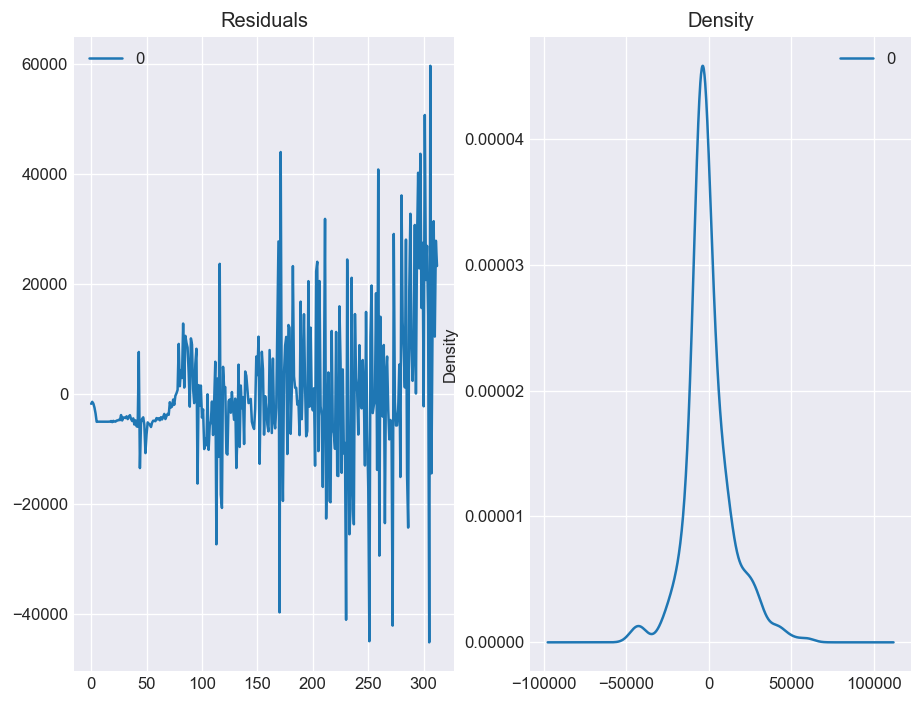

In [29]:
model = ARIMA(x, order=(5,1,0))
model_fit = model.fit(disp=0)
residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

From above, we may see that the mean of the residuals is -32. Considering the data deals with hundreds of thousands of cases, this is a very acceptable number: average world cases over the data set were 160,000, so 32 is an acceptable mean residual error.

Next, looking at the graph of the residuasl over time, we may see that they appear to be stationary. From this, we understand that the model captures the variation in the data well, and there is little unexplained variation left (perhaps one may distinguish a slight postitive trend, but it is extremely minor).

Lastly, the density distribution of the residuals very well approximates that of a normal distribution, signifying homoskedasticity which in turn attests to the statistical performance of the model. 

### 4.4.1 c) Forecasting <a class="ForNWF" id="ForNWF"></a>

In the following graph, we may see the model predictions (in red) vs. the actual cases for the length of the validation dataset, that is, the last 25% of the values of the data set. It is quite accurate at the start of the graph, but after 40 periods it begins to deviate signficantly. I also output the actual RMSE which doesn't make use of walk-forward validation

WF Validation RMSE: 87209.828


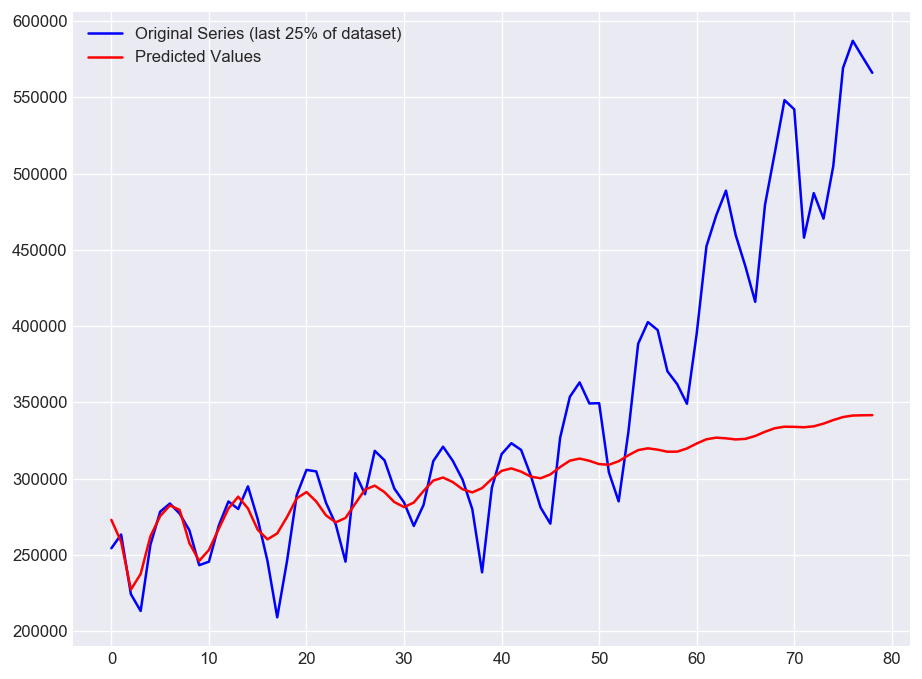

In [60]:
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)
prediction_list_510 = model_fit.forecast(steps = (len(W)-len(train)))[0]

mse = mean_squared_error(test, prediction_list_510)
rmse = sqrt(mse)
print('WF Validation RMSE: %.3f' % rmse)

plt.plot(test, color = 'blue', label = 'Original Series (last 25% of dataset)')
plt.plot(prediction_list_510, color='red', label = 'Predicted Values')
plt.legend()
plt.show()

Next, I use the chosen model to create a forecast 90 days into the future. We may see the forecasted values as well as 95% confidence interval. The model predicts roughly 650,000 cases. 

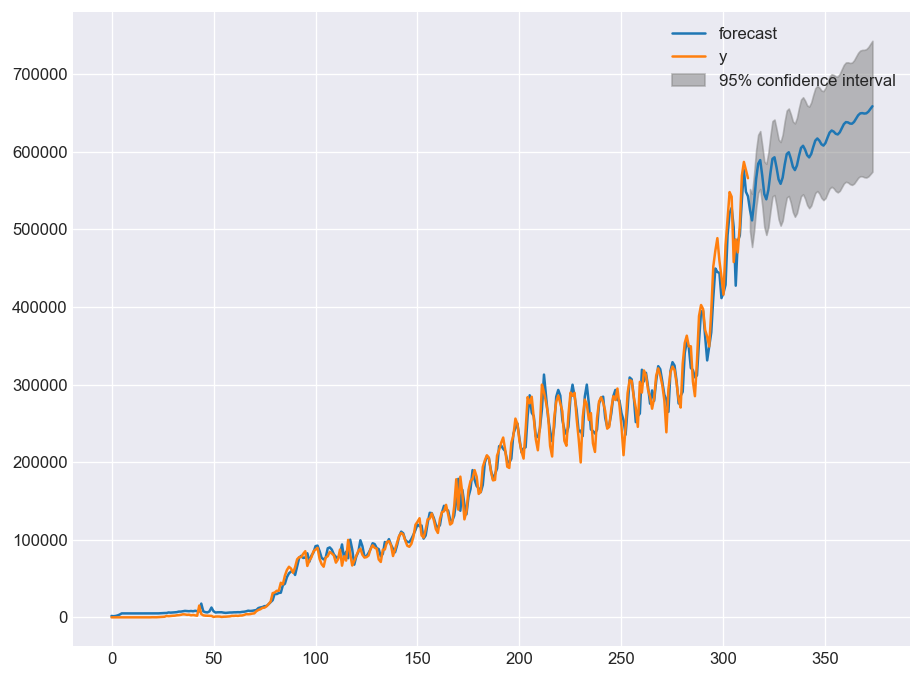

In [31]:
model = ARIMA(x, order=(5,1,0))
model_fit = model.fit(disp=-2)
model_fit.plot_predict(1,len(x)+60)

### 4.4.2 ARIMA Model (Non-Walk-Forward Validation) <a class="NWF" id="NWF"></a>

In this section, I perform an automated parameter search using the non-walk forwad validation method, i.e. not using the last day of each prediction to improve the next value. I adjusted the code previously used from the website to obtain this non-walk forward validation approach. This is perhaps a more realistic method which may yield more accurate predictions for the longer term, which is the scope of this project.

In [32]:
def evaluate_model(order):
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    prediction_list = model_fit.forecast(steps = (len(W)-len(train)))[0]
    mse = mean_squared_error(test, prediction_list)
    rmse = sqrt(mse)
    return rmse

def test_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    score = evaluate_model(order)
                    if score < best_score:
                        best_score, best_cfg = score, order
                    print('ARIMA%s RMSE=%.3f' % (order,score))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

warnings.filterwarnings("ignore")
test_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=265581.322
ARIMA(0, 0, 1) RMSE=265030.193
ARIMA(0, 1, 0) RMSE=78221.841
ARIMA(0, 1, 1) RMSE=78776.151
ARIMA(0, 1, 2) RMSE=82067.066
ARIMA(0, 1, 3) RMSE=82358.909
ARIMA(0, 2, 0) RMSE=430733.146
ARIMA(0, 2, 1) RMSE=60317.462
ARIMA(0, 2, 2) RMSE=59126.926
ARIMA(0, 2, 3) RMSE=136710.348
ARIMA(1, 0, 0) RMSE=165725.895
ARIMA(1, 0, 1) RMSE=184978.481
ARIMA(1, 0, 2) RMSE=133209.410
ARIMA(1, 0, 3) RMSE=135558.697
ARIMA(1, 0, 4) RMSE=144313.109
ARIMA(1, 0, 5) RMSE=151983.243
ARIMA(1, 1, 0) RMSE=78577.171
ARIMA(1, 1, 1) RMSE=80372.344
ARIMA(1, 1, 2) RMSE=81319.946
ARIMA(1, 1, 5) RMSE=90051.442
ARIMA(1, 2, 0) RMSE=146938.442
ARIMA(1, 2, 2) RMSE=137652.439
ARIMA(2, 0, 0) RMSE=182384.196
ARIMA(2, 0, 1) RMSE=133844.687
ARIMA(2, 0, 2) RMSE=133972.323
ARIMA(2, 1, 0) RMSE=79644.974
ARIMA(2, 1, 2) RMSE=94478.902
ARIMA(2, 1, 4) RMSE=83902.601
ARIMA(2, 2, 0) RMSE=413004.598
ARIMA(2, 2, 2) RMSE=284488.627
ARIMA(3, 0, 0) RMSE=160604.645
ARIMA(3, 0, 2) RMSE=136673.977
ARIMA(3, 1, 0) RMSE=8

The best model seems to me ARIMA(0,2,2). As  it can be seen in the next cell, this provides statistical significance on the coefficients but not on the value of the constant.

In [33]:
w_covid = n_cases['World']
x = w_covid.values
x = x.astype('float32')

model = ARIMA(x, order=(0,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  312
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -3514.539
Method:                       css-mle   S.D. of innovations          18712.408
Date:                Wed, 27 Jan 2021   AIC                           7037.078
Time:                        09:57:29   BIC                           7052.050
Sample:                             2   HQIC                          7043.062
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0794     14.166      1.064      0.288     -12.686      42.845
ma.L1.D2.y    -0.7878      0.056    -14.010      0.000      -0.898      -0.678
ma.L2.D2.y    -0.2122      0.056     -3.813      0.0

Next, I plot the residuals. The mean is -110 and as it can be seen from the graph they are mostly centered around zero. This is an acceptable residual density given such large variations within the data set.

                  0
count    312.000000
mean    -110.936263
std    18783.809677
min   -84875.499176
25%    -9595.456460
50%      -90.574302
75%     4638.613256
max    64789.596409


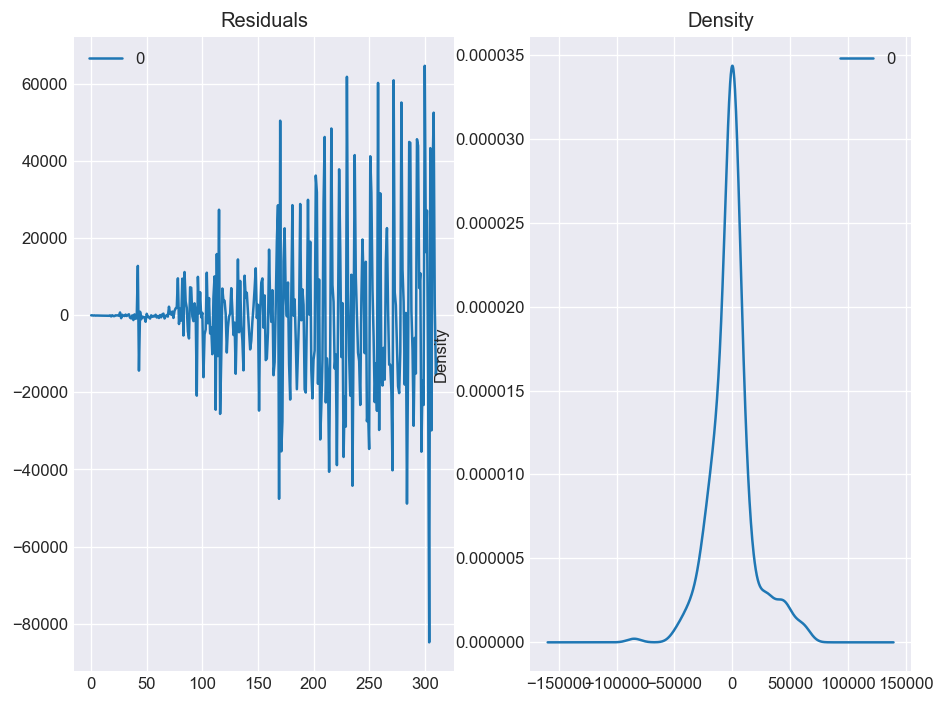

In [59]:
w_covid = n_cases['World']
x = w_covid.values
x = x.astype('float32')
model = ARIMA(x, order=(0,2,2))
model_fit = model.fit(disp=0)

residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

As we can see below, comparing the train test to the prediction, the non-walk-forward validation method suggesting ARIMA(0,2,2) actually provided a more accurate long-term forecast (as can be judged by the lower RMSE value). Despite it not being as accurate in the first 40 days of the train dataset as the ARIMA(5,1,0) model, it captures the trend growth into the future better.

Non-WF Validation RMSE: 59126.926


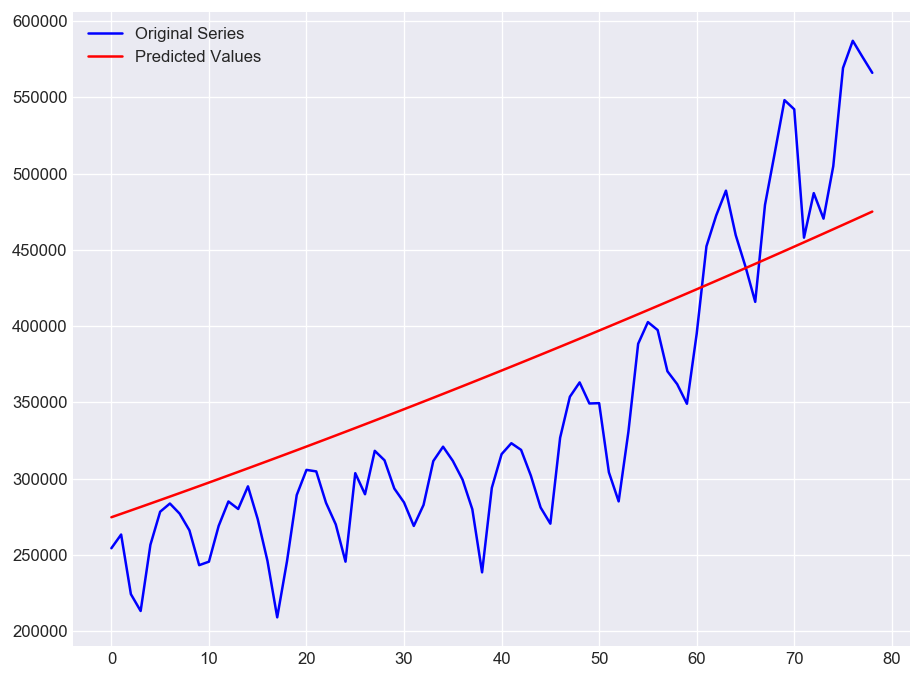

In [35]:
model = ARIMA(train, order=(0,2,2))
model_fit = model.fit(disp=0)
prediction_list_022 = model_fit.forecast(steps = (len(W)-len(train)))[0]

mse = mean_squared_error(test, prediction_list_022)
rmse = sqrt(mse)
print('Non-WF Validation RMSE: %.3f' % rmse)

plt.plot(test, color = 'blue', label = 'Original Series')
plt.plot(prediction_list_022, color='red', label = 'Predicted Values')
plt.legend()
plt.show()

Next, I output a forecast 90 days into the future, along with a larger confidence interval than the ARIMA(5,2,0) model. The model predicts 850,000 cases compared to the 650,000 of the ARIMA(5,2,0). 

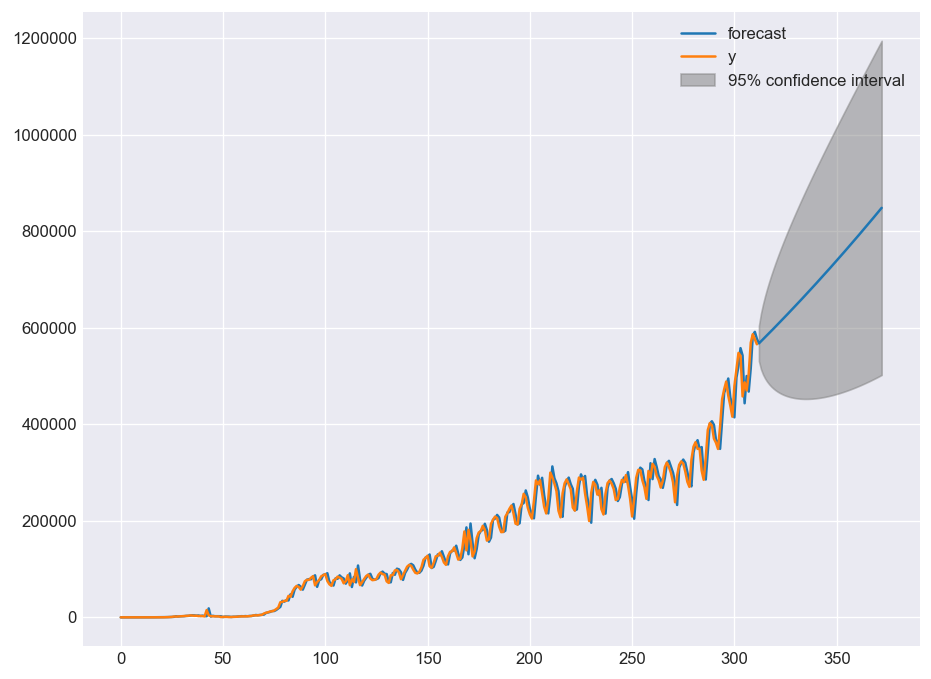

In [36]:
model = ARIMA(x, order=(0,2,2))
model_fit = model.fit(disp=-2)
model_fit.plot_predict(2,len(x)+60)

In the end, I predict the number of cases for 90 days (around 3 months) into the future after the end of the dataset.

## 4.5 EU Cases Forecasting <a class="EU" id="EU"></a>

### 4.5.0 ARIMA Model (Walk-Forward Validation) <a class="EUWF" id="EUWF"></a>

Since the automated paramter search models performed better in both the walk-forward and non-walk-forward validation cases, I will directly start with this parametrization method for the EU cases.

In [37]:
eu_cases = cases['EU Cases']
X = eu_cases.values

def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(trend='nc', disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s RMSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


series = eu_cases

p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=58093.726
ARIMA(0, 0, 2) RMSE=40456.943
ARIMA(0, 1, 1) RMSE=16023.628
ARIMA(0, 2, 1) RMSE=17917.682
ARIMA(1, 0, 0) RMSE=18053.457
ARIMA(1, 1, 0) RMSE=16418.891
ARIMA(1, 1, 1) RMSE=16166.980
ARIMA(1, 1, 2) RMSE=16196.612
ARIMA(1, 1, 3) RMSE=16066.704
ARIMA(1, 1, 4) RMSE=15340.292
ARIMA(1, 2, 0) RMSE=23528.170
ARIMA(2, 0, 0) RMSE=16526.904
ARIMA(2, 1, 0) RMSE=16290.405
ARIMA(2, 1, 1) RMSE=16367.785
ARIMA(2, 2, 0) RMSE=20182.483
ARIMA(3, 1, 0) RMSE=16460.177
ARIMA(3, 1, 1) RMSE=16397.142
ARIMA(3, 2, 0) RMSE=17814.601
ARIMA(3, 2, 1) RMSE=15297.992
ARIMA(3, 2, 2) RMSE=16350.832
ARIMA(4, 1, 0) RMSE=16549.826
ARIMA(4, 1, 1) RMSE=16569.248
ARIMA(4, 2, 0) RMSE=17392.868
ARIMA(4, 2, 1) RMSE=16323.785
ARIMA(5, 1, 0) RMSE=16752.736
ARIMA(5, 1, 1) RMSE=15119.964
ARIMA(5, 2, 0) RMSE=17512.844
ARIMA(5, 2, 2) RMSE=14765.973
Best ARIMA(5, 2, 2) RMSE=14765.973


The best suited model from the automated search was ARIMIA(5,2,2). As we can see below, this provides statistically significant coefficients on all variables besides the constant and the 4th lag.

In [38]:
eu_cases = cases['EU Cases']
x = eu_cases.values
x = x.astype('float32')

model = ARIMA(x, order=(5,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  312
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -3201.442
Method:                       css-mle   S.D. of innovations           6859.197
Date:                Wed, 27 Jan 2021   AIC                           6420.885
Time:                        10:11:05   BIC                           6454.572
Sample:                             2   HQIC                          6434.348
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.1682     12.607      1.441      0.151      -6.541      42.878
ar.L1.D2.y    -1.3992      0.067    -20.980      0.000      -1.530      -1.269
ar.L2.D2.y    -0.9440      0.111     -8.503      0.0

As seen below, the mean of the residuals is only approximately -19 and well centered around zero.

                  0
count    312.000000
mean     -18.820574
std     6870.201530
min   -37072.034617
25%    -1678.273077
50%     -383.055881
75%      988.589081
max    32427.345242


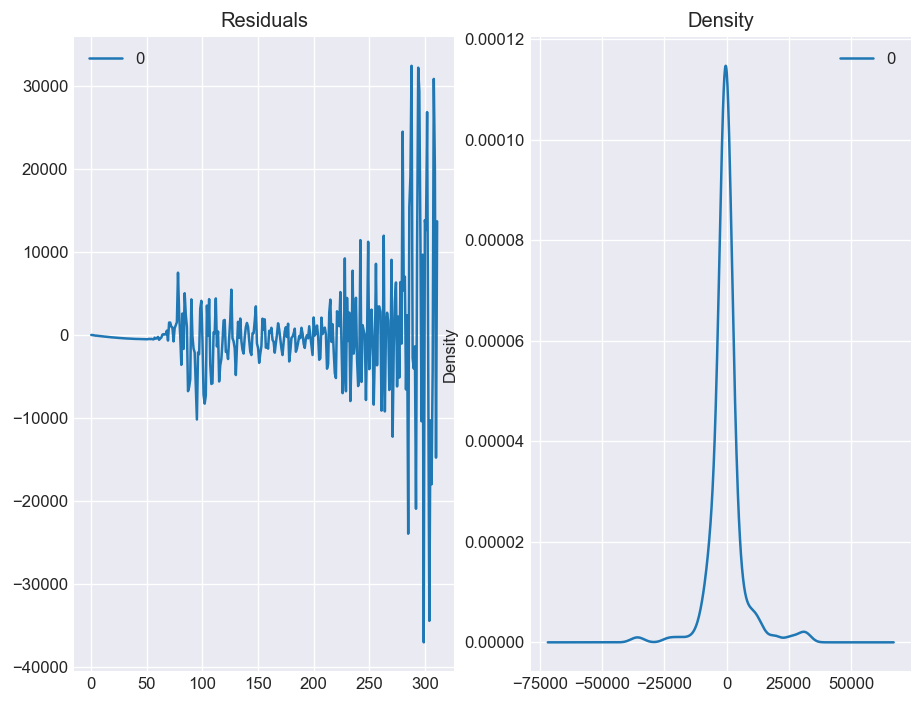

In [52]:
model = ARIMA(x, order=(5,2,2))
model_fit = model.fit(disp=0)

residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Next, I output the forecast for EU cases 90 days into the future, along with a 95% confidence interval. The model predicts 600,000 cases.

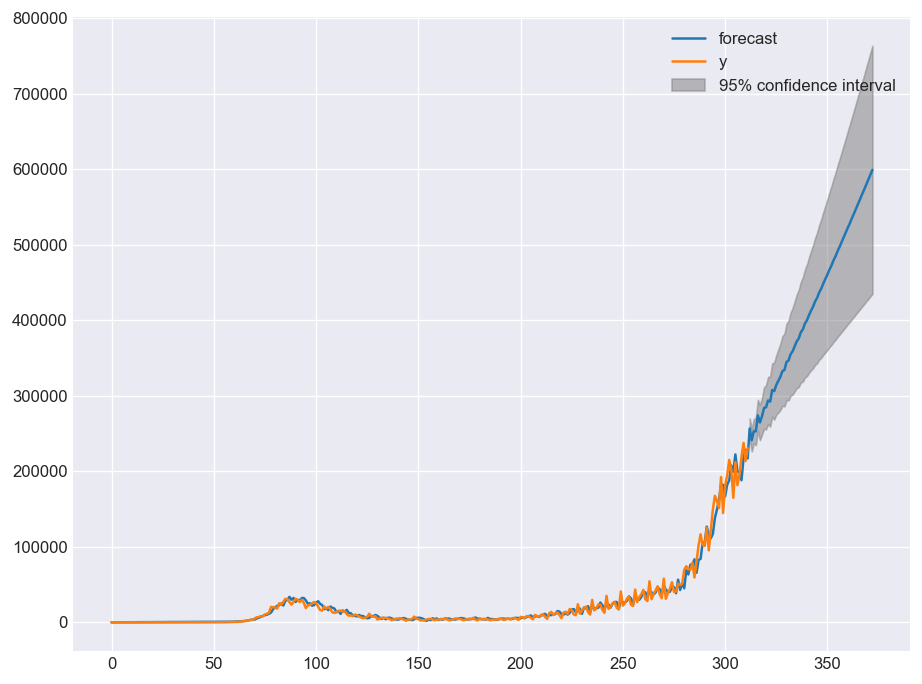

In [40]:
model = ARIMA(x, order=(5,2,2))
model_fit = model.fit(disp=-2)
model_fit.plot_predict(2,len(x)+60)

### 4.5.1 ARIMA Model (Non-Walk-Forward Validation) <a class="EUNWF" id="EUNWF"></a>

Lastly, I perform an automated parameter search using the non-walk-forward validation method for EU cases. This yields the best model as being ARIMA(0,2,0).

In [41]:
eu_cases = cases['EU Cases']


X = eu_cases.values


def evaluate_model(order):
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order = order)
    model_fit = model.fit(disp=0)
    prediction_list = model_fit.forecast(steps = (len(W)-len(train)))[0]
    mse = mean_squared_error(test, prediction_list)
    rmse = sqrt(mse)
    return rmse

def test_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    score = evaluate_model(order)
                    if score < best_score:
                        best_score, best_cfg = score, order
                    print('ARIMA%s RMSE=%.3f' % (order,score))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 3)
q_values = range(0, 6)

warnings.filterwarnings("ignore")
test_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=97619.184
ARIMA(0, 0, 1) RMSE=97598.973
ARIMA(0, 0, 2) RMSE=97631.618
ARIMA(0, 0, 4) RMSE=97543.986
ARIMA(0, 0, 5) RMSE=97556.771
ARIMA(0, 1, 0) RMSE=84427.570
ARIMA(0, 1, 1) RMSE=85443.565
ARIMA(0, 1, 2) RMSE=85869.030
ARIMA(0, 1, 3) RMSE=85549.031
ARIMA(0, 1, 4) RMSE=86339.342
ARIMA(0, 1, 5) RMSE=87261.585
ARIMA(0, 2, 0) RMSE=41761.254
ARIMA(0, 2, 1) RMSE=80271.821
ARIMA(1, 0, 0) RMSE=96322.084
ARIMA(1, 0, 1) RMSE=93869.458
ARIMA(1, 0, 2) RMSE=93715.808
ARIMA(1, 0, 3) RMSE=93659.004
ARIMA(1, 0, 4) RMSE=94140.658
ARIMA(1, 0, 5) RMSE=94309.931
ARIMA(1, 1, 0) RMSE=84702.116
ARIMA(1, 1, 1) RMSE=85702.793
ARIMA(1, 1, 2) RMSE=85693.323
ARIMA(1, 1, 3) RMSE=81548.041
ARIMA(1, 1, 4) RMSE=81984.701
ARIMA(1, 1, 5) RMSE=82500.749
ARIMA(1, 2, 0) RMSE=55958.086
ARIMA(1, 2, 3) RMSE=42053.023
ARIMA(1, 2, 4) RMSE=73020.528
ARIMA(1, 2, 5) RMSE=59402.153
ARIMA(2, 0, 0) RMSE=95236.496
ARIMA(2, 0, 1) RMSE=93525.211
ARIMA(2, 0, 3) RMSE=95262.778
ARIMA(2, 0, 4) RMSE=96449.639
ARIMA(2, 0

Looking at the statistical signficance, we may see an insignficant constant which may cause some problems with the forecast.

In [42]:
eu_cases = cases['EU Cases']
x = eu_cases.values
x = x.astype('float32')

model = ARIMA(x, order=(0,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  312
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -3452.534
Method:                           css   S.D. of innovations          15473.391
Date:                Wed, 27 Jan 2021   AIC                           6909.069
Time:                        10:12:08   BIC                           6916.555
Sample:                             2   HQIC                          6912.061
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7500    876.008      0.062      0.950   -1662.195    1771.695


The residuals distribution seen below is more than acceptable with the mean being zero.

                  0
count  3.120000e+02
mean   2.332038e-14
std    1.549825e+04
min   -8.853775e+04
25%   -1.460250e+03
50%   -5.475000e+01
75%    1.958000e+03
max    8.456725e+04


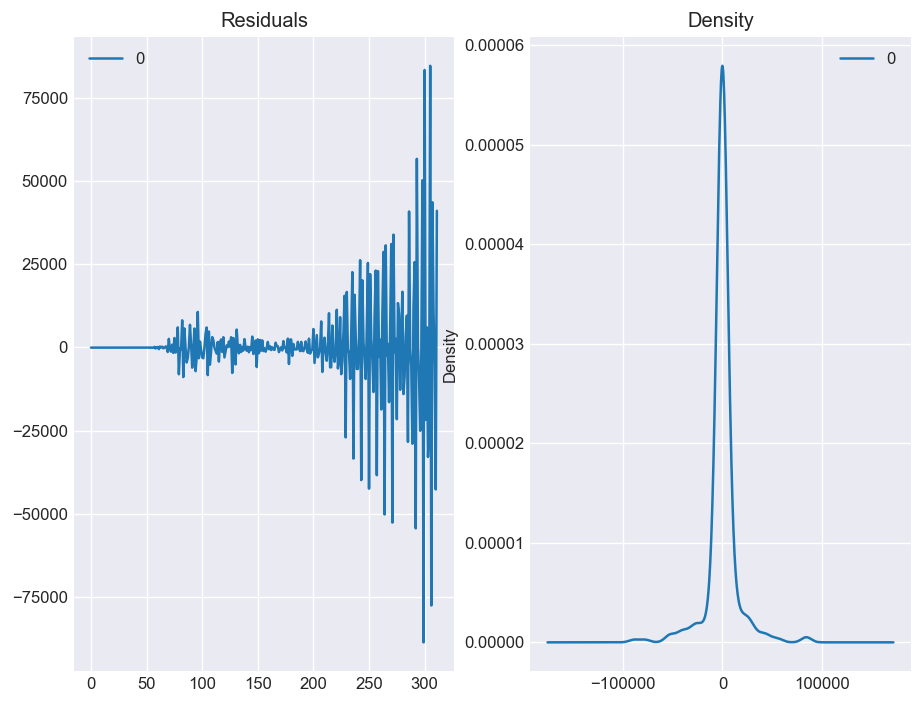

In [53]:
model = ARIMA(x, order=(0,2,0))
model_fit = model.fit(disp=0)

residuals = pd.DataFrame(model_fit.resid)
print(residuals.describe())
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Next, looking at the forecast, we may see a very large confidence interval signalling the lack of accuracy for the prediction. Nevertheless, the forecasted number is approxiamtely 1,250,000 new cases.

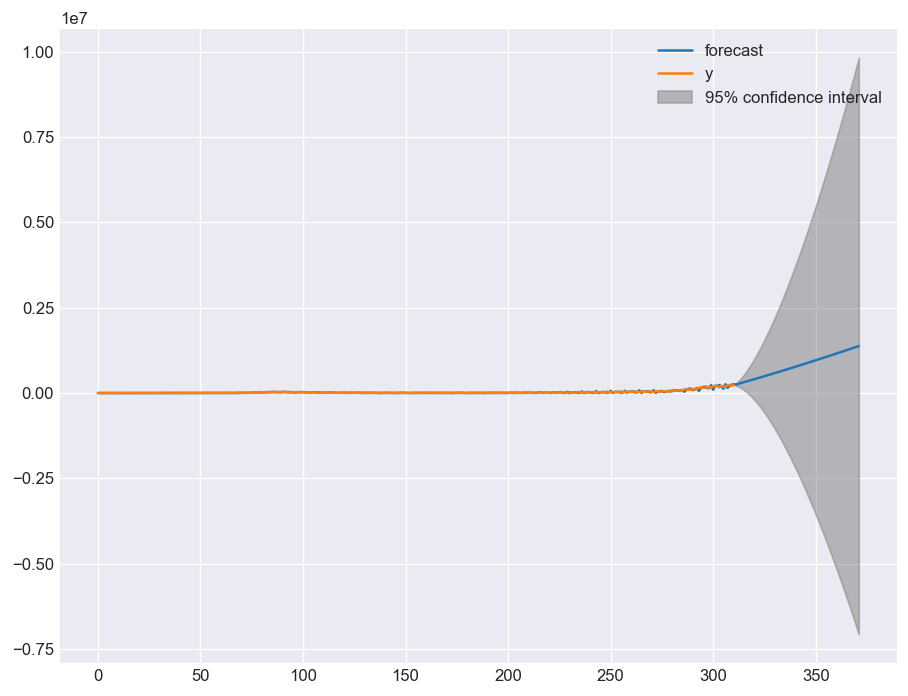

In [44]:
eu_cases = cases['EU Cases']
x = eu_cases.values

model = ARIMA(x, order=(0,2,0))
model_fit = model.fit(disp=-2)
model_fit.plot_predict(3,len(x)+60)

## 4.6 Comparison of Forecast to Real Data <a class="forecast" id="forecast"></a>

Now that that the two models are established it is time to compare them to actual data and test the accuracy of their prediction. To reiterate, I used data up until November to create the models and have forecasted 90 days into the future up until the current date.

Reviewing the predictions from the previous section, we have obtained the following:

World Cases:
- Walk-forward validation forecast ARIMA(5,1,0):         650,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,2):     850,000 New Cases


EU Cases:
- Walk-forward validation forecast ARIMA(5,2,2):         600,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,0):     1,250,000 New Cases

I begin by importing the most current data set to which the forecasted values will be compared. The format of the dataset changed from the previous one after the European Center for Disease Prevention stopped updating daily figures and instead changed to a weekly format. As such, I am using a slightly different looking set.

In [45]:
final_data = pd.read_csv("owid-covid-data.csv", header=0, index_col=0, parse_dates=True, squeeze=True)


final_cases = final_data[['date','location', 'new_cases']]
selected = final_cases.loc[['OWID_WRL', 'AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA','MLT','NLD','POL','PRT','ROU','SVK','SVN','SWE']]

selected.head(5)

,date,location,new_cases
iso_code,,,
OWID_WRL,2020-01-22,World,0.0
OWID_WRL,2020-01-23,World,99.0
OWID_WRL,2020-01-24,World,287.0
OWID_WRL,2020-01-25,World,493.0
OWID_WRL,2020-01-26,World,684.0


In order to get the dataset to look similar to the last one (and have an easier time performing time-series analysis), I use the pivot function to keep the date as rows and make each column a country. I also sum the EU countries to obtain the total EU cases value.

In [71]:
pivotdf = selected.pivot(index="date", columns="location", values="new_cases")

pivotdf['EU Cases'] = pivotdf.iloc[:, :26].sum(axis=1)
pivotdf.drop(pivotdf.tail(1).index, inplace = True) 
pivotdf.tail(5)

location,Austria,Belgium,Bulgaria,Croatia,Cyprus,Czechia,Denmark,Finland,France,Germany,...,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,World,EU Cases
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,1642.0,876.0,1029.0,361.0,665.0,6233.0,2078.0,147.0,4084.0,12320.0,...,6614.0,4385.0,4369.0,3130.0,636.0,772.0,30579.0,0.0,545335.0,100811.0
2021-01-05,2311.0,1848.0,1310.0,1071.0,569.0,12921.0,1997.0,299.0,20825.0,18349.0,...,6506.0,7596.0,4956.0,4729.0,2989.0,2512.0,23700.0,32369.0,735356.0,171999.0
2021-01-06,2469.0,2997.0,1002.0,1896.0,573.0,17332.0,2230.0,331.0,25232.0,26663.0,...,7238.0,14220.0,10027.0,5719.0,4959.0,3354.0,0.0,0.0,777203.0,161713.0
2021-01-07,2540.0,2923.0,867.0,562.0,427.0,17773.0,1844.0,223.0,254.0,45333.0,...,9745.0,12119.0,9927.0,4951.0,2137.0,2821.0,42360.0,12536.0,861748.0,201874.0
2021-01-08,2063.0,2048.0,753.0,1098.0,466.0,14861.0,1663.0,296.0,41373.0,19077.0,...,8258.0,8763.0,10176.0,4841.0,2980.0,2084.0,25456.0,7187.0,812212.0,186392.0


From the tail of the dataframe above, we may note the value for new cases on the 8th of January. Next, I plot the World and EU cases so we may see their evolution from the 22nd of January to the 8th of January 2021.

In the cause of the EU, the number of cases experienced an exponential increase starting around day 250, after which it experienced a decrease before starting to increase again.

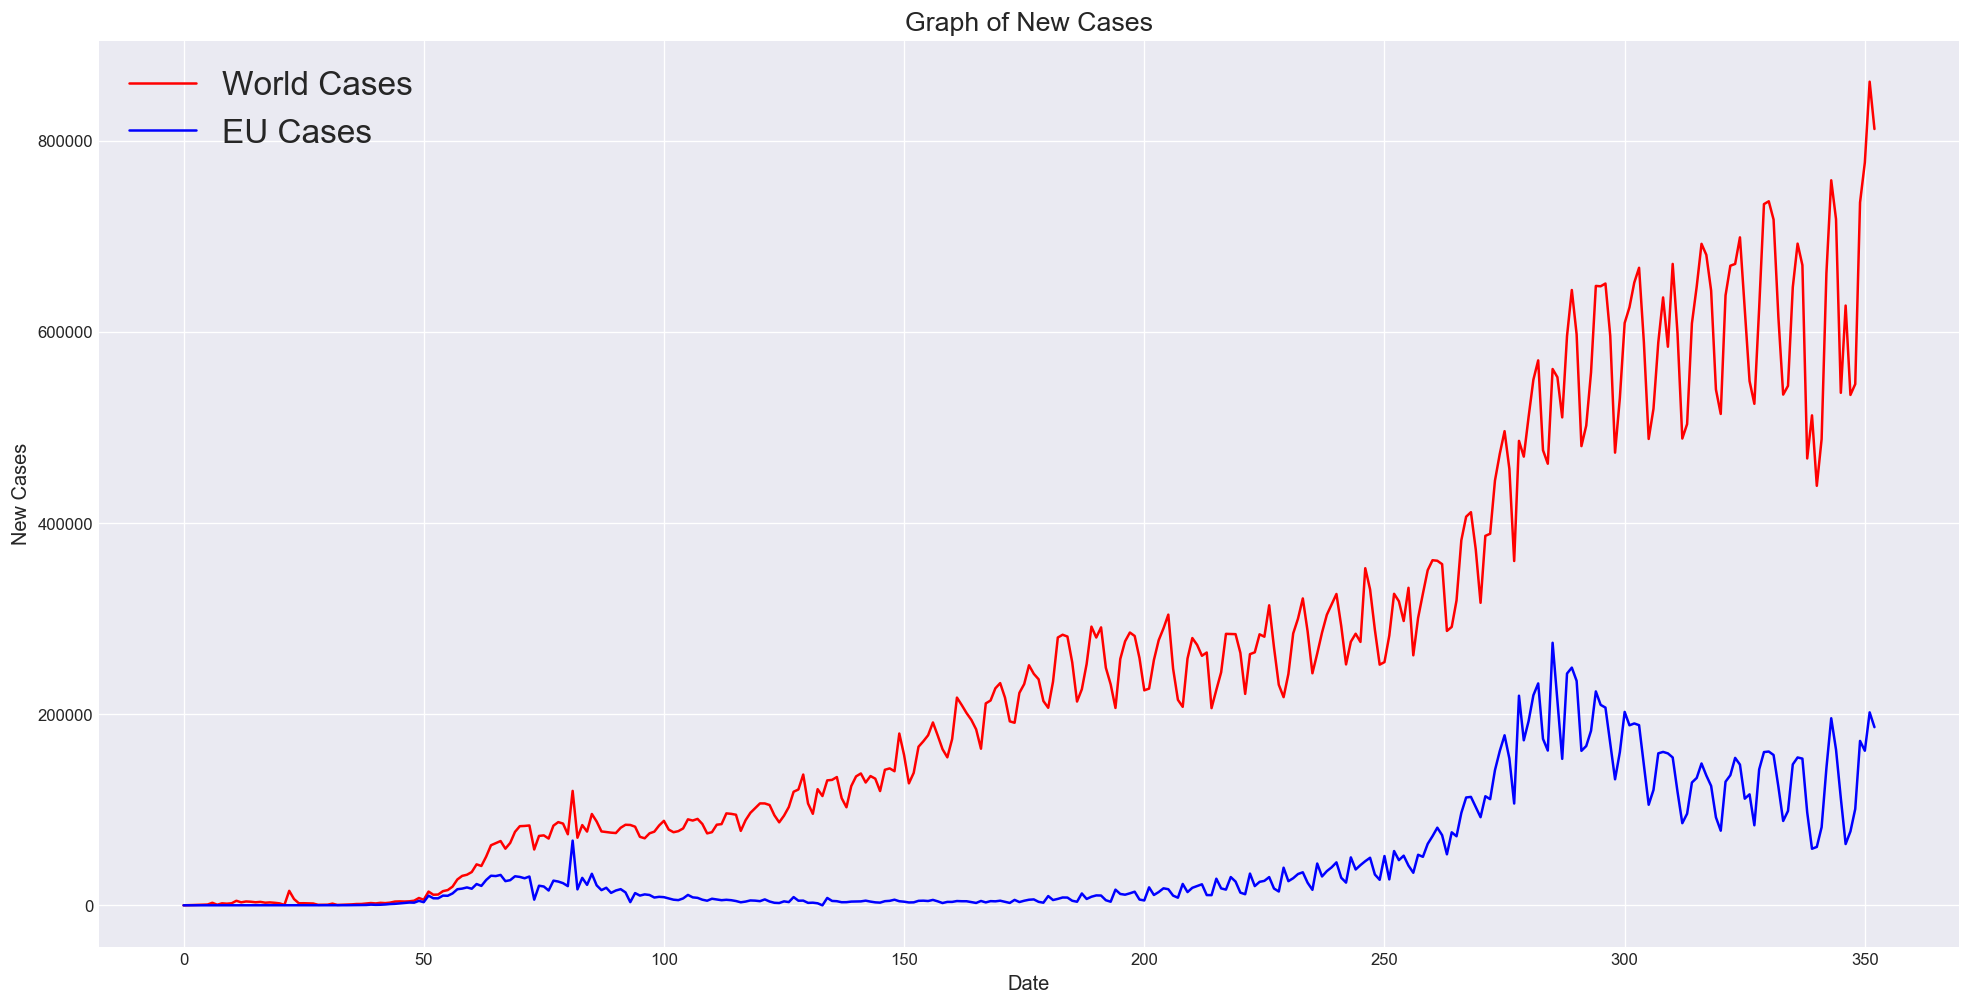

In [76]:
xvalsf = []
x=0
for i in range(len(pivotdf['World'])):
    xvalsf.append(x)
    x = x + 1

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.plot(xvalsf, pivotdf['World'], color = 'red', label = 'World Cases')
plt.plot(xvalsf, pivotdf['EU Cases'], color = 'blue', label = 'EU Cases')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('New Cases', fontsize = 12)
plt.title('Graph of New Cases', fontsize = 16)
plt.legend(loc = 'best', prop={'size': 20})
plt.show()

Finally, to compare the actual numbers versus the forecasts, we have the following:

World Cases:
- Walk-forward validation forecast ARIMA(5,1,0):         650,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,2):     850,000 New Cases


EU Cases:
- Walk-forward validation forecast ARIMA(5,2,2):         600,000 New Cases
- Non-walk-forward validation forecast ARIMA(0,2,0):     1,250,000 New Cases

Actual values (from the last row of the dataframe):

- World: 812,212

- EU: 186,392

We may notice that the non-walk-forward validation method performed better the case of the World forecase, whereas the walk-forward validation method performed better in the case of EU forecast (but both were extremely innacurate). The differences in forecast are as follows:

World Cases Forecast Difference:
- Walk-forward validation forecast:         -162,212 (19.97% underpredicted)
- Non-walk-forward validation forecast:      37,788 (4.65% overpredicted)


EU Cases Forecast Difference:
- Walk-forward validation forecast:         413,608 (221.90% overpredicted)
- Non-walk-forward validation forecast:     1,063,608 (570.63% overpredicted)


# 5. Conclusion and Discussion <a class="Conc" id="Conc"></a>

It can be concluded that the non-walk-forward validiation method is better than the walk-forward validation method for longer term, more stable predictions. The Non-WF method performed better than the WF in the case of World forecast, whereas the WF method performed better in the case of the EU forecast. However, for the EU, both methods performed extremely poorly. The reason for this is because of the development of new cases as can be seen in the last graph above. Due to the fact that by November 8th the EU cases appeared to be increasing exponentially, both ARIMA methods performed their forecast based on this type of growth, but in reality, the cases dropped after that peak which severly affected the accuracy of the forecasts.

In the case of World cases, as we may see from section 4.4.1 c) and 4.4.2, in particular the graphs showing the prediction vs. the actual development of the cases for the training dataset, the walk-forward validation method is very accurate in the short term and actually manages to capture the day to day fluctuations in the data. However, in the longer term, the walk-forward validation performs worse as it is unable to account for the overall increase in the number of new cases. Reviewing the RMSEs for those two graphs we had obtained the following:
- WF Validation RMSE: 87209.828
- Non-WF Validation RMSE: 59126.926

As such, despite the better performance of the WF method in the first few days of the training dataset, its longer term prediction fails to provide an accurate account. For this reason, the forecast accuracy in the last part of the result section (4.6) is quite lower for the WF method for World cases.

This difference is also given by the model specifications. Whereas for both World and EU cases the WF method yields more complicated models (ARIMA(5,1,0) and ARIMA(5,2,2) respectively), the Non-WF method yields simpler models (ARIMA(0,2,2), ARIMA(0,2,0) respectively). It is worth noting that along with a simpler model comes a much larger confidence interval as well. As such, while the forecasted value of the simpler models with Non-WF is perhaps more correct, its statistical accuracy is not. Overall, the simpler Non-WF models have both outputted higher predictions than the WF ones. This may mean that they capture the exponentiality in the trend more, but whether this is correct will depend on the realized development of the cases.

The main weakness of the approach is an inability to account for variables which may influence the number of new cases but whose information is not contained in the dataset up to the moment. In other words, the forecast of the evolution at the moment is based solely on how the number of new cases changes. It does not account for different levels of stringency in restrictions, seasonal pattersn (as viruses tend to be transmitted less during the summer) or for e.g. the widespread implementation of a vaccine. In order to address this severe weakness one may choose to use another popular forecasting tool: the VAR (vector autoregressive) model. This type of approach uses multiple variables arranged in a vector that impact the dependent variable. By implementing this kind of approach the accuracy of the forecasts may increase especially in the case of a significant change of underlying conditions (e.g. the vaccine is widely used or a new, more contagious strain of the virus appears such as the UK variant). 

In the end, I have shown how ARIMA models can be used to forecast the development of time-series data, offering surprising accuracy when applied to the prediction of new cases of COVID worldwide. Despite the simple formulation of the ARIMA model as a single-variable prediction method, the results confirm why this approach remains a popular choice in an economist's toolkit. It is able to capture the trend well, but sadly not account for changes in underlying conditions.




# 6. Bibliography <a class="Bib" id="Bib"></a>

https://otexts.com/fpp2/arima.html

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

https://people.duke.edu/~rnau/arimrule.htm

http://people.duke.edu/~rnau/Notes_on_nonseasonal_ARIMA_models--Robert_Nau.pdf

